# Advanced Regression
## House price

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Steps

Following steps are followed;

1) Understanding the Data & EDA
2) Data preparation
3) Building and Training model
4) Residual analysis
5) Prediction and evaluation of models


## Step 1: Understanding the Data and EDA

Import neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#to see all the rows/columns in scrollable window
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

### Data Dictionary

    MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

## EDA
### Data cleaning

In [400]:
#housingData = pd.read_csv("train.csv")
housingData = pd.read_csv("train.csv", keep_default_na=False, na_values=['NA'])
#housingData = pd.read_csv("train.csv", na_values=['', 'NA', 'N/A', 'NULL', 'NaN'])

In [401]:
housingData.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [402]:
housingData.shape

(1460, 81)

In [403]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [404]:
percentage_null = (housingData.isnull().sum() / len(housingData)) * 100
percentage_null = percentage_null[percentage_null > 0]
print(percentage_null)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [405]:
null_colum_numeric = housingData[percentage_null.index].select_dtypes(include='number').columns.tolist()
print(null_colum_numeric)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [406]:
housingData['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [407]:
housingData['LotFrontage'].mode()

0    60.0
Name: LotFrontage, dtype: float64

In [408]:
housingData['LotFrontage'].fillna(housingData['LotFrontage'].mode()[0], inplace=True)

##### Percentage of NaN values in `MasVnrArea` & `GarageYrBlt` is small so will not drop or impute

In [409]:
null_colum_category = housingData[percentage_null.index].select_dtypes(include='object').columns.tolist()
print(null_colum_category)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [410]:
housingData[null_colum_category].head()

Alley MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0   NaN    BrkFace       Gd       TA           No          GLQ          Unf   
1   NaN       None       Gd       TA           Gd          ALQ          Unf   
2   NaN    BrkFace       Gd       TA           Mn          GLQ          Unf   
3   NaN       None       TA       Gd           No          ALQ          Unf   
4   NaN    BrkFace       Gd       TA           Av          GLQ          Unf   

  Electrical FireplaceQu GarageType GarageFinish GarageQual GarageCond PoolQC  \
0      SBrkr         NaN     Attchd          RFn         TA         TA    NaN   
1      SBrkr          TA     Attchd          RFn         TA         TA    NaN   
2      SBrkr          TA     Attchd          RFn         TA         TA    NaN   
3      SBrkr          Gd     Detchd          Unf         TA         TA    NaN   
4      SBrkr          TA     Attchd          RFn         TA         TA    NaN   

  Fence MiscFeature  
0   NaN         NaN  
1   NaN         NaN  
2   NaN         NaN  
3   NaN         NaN  
4   NaN         NaN

In [411]:
for column in ['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature']:
    print(housingData[column].value_counts())

Alley
Grvl    50
Pave    41
Name: count, dtype: int64
FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64
MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64


In [412]:
for column in ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']:
    housingData[column] = housingData[column].fillna('none')

In [413]:
for column in ['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature']:
    print(housingData[column].value_counts())

Alley
none    1369
Grvl      50
Pave      41
Name: count, dtype: int64
FireplaceQu
none    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: count, dtype: int64
PoolQC
none    1453
Gd         3
Ex         2
Fa         2
Name: count, dtype: int64
Fence
none     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64
MiscFeature
none    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64


In [414]:
percentage_null = (housingData.isnull().sum() / len(housingData)) * 100
percentage_null = percentage_null[percentage_null > 0]
print(percentage_null)

MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64


##### comments

In [415]:
housingData.duplicated().sum()

0

##### `Id` can be dropped

In [506]:
housingData_cleaned = housingData.drop(['Id'],axis=1)

In [392]:
import matplotlib.pyplot as plt
import seaborn as sns

In [507]:
housingData_cleaned['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [510]:
housingData_cleaned['SalePrice'].describe()

count      1399.000000
mean     170237.127234
std       59230.130817
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203500.000000
max      340000.000000
Name: SalePrice, dtype: float64

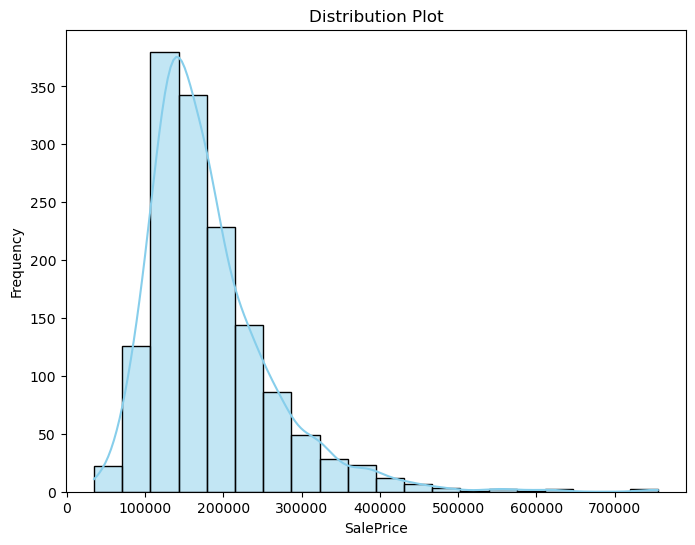

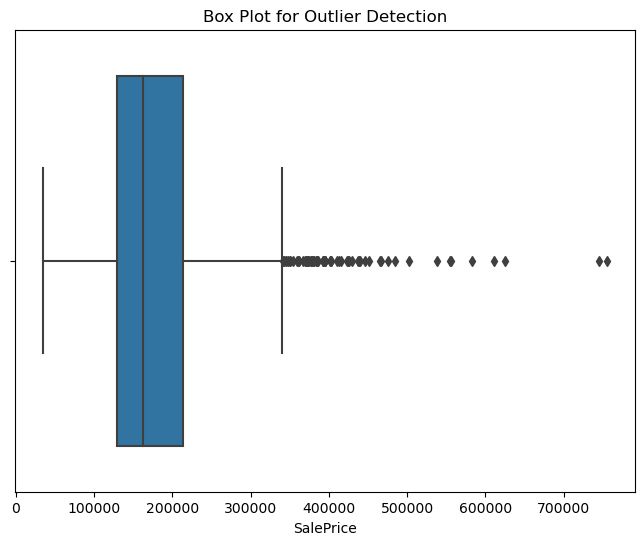

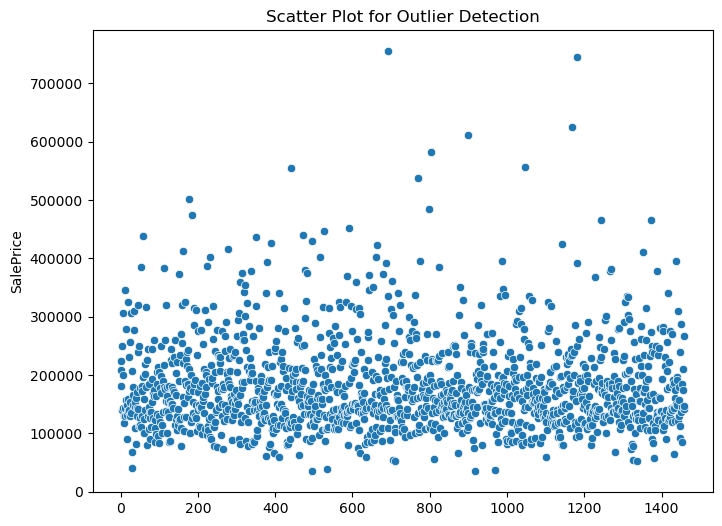

In [508]:
plt.figure(figsize=(8, 6))
sns.histplot(housingData_cleaned['SalePrice'], kde=True, color='skyblue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=housingData_cleaned['SalePrice'])
plt.title('Box Plot for Outlier Detection')
plt.show()

# Scatter plot to visualize the data points and identify potential outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x=housingData_cleaned.index, y=housingData_cleaned['SalePrice'])
plt.title('Scatter Plot for Outlier Detection')
plt.show()

In [509]:
k = 1.5
lower_bound = housingData_cleaned['SalePrice'].quantile(0.25) - k * (housingData_cleaned['SalePrice'].quantile(0.75) - housingData_cleaned['SalePrice'].quantile(0.25))
upper_bound = housingData_cleaned['SalePrice'].quantile(0.75) + k * (housingData_cleaned['SalePrice'].quantile(0.75) - housingData_cleaned['SalePrice'].quantile(0.25))

# Remove outliers
housingData_cleaned = housingData_cleaned[(housingData_cleaned['SalePrice'] >= lower_bound) & (housingData_cleaned['SalePrice'] <= upper_bound)]


##### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [511]:
numeric_columns = housingData_cleaned.select_dtypes(include='number')
print(len(numeric_columns.columns))

37


In [512]:
df_columns = numeric_columns.columns
num_columns = len(numeric_columns.columns)

split1 = num_columns // 4
split2 = 2 * split1
split3 = 3 * split1

# Extract parts based on the splits
df_part1 = numeric_columns.iloc[:, :split1]
df_part2 = numeric_columns.iloc[:, split1:split2]
df_part3 = numeric_columns.iloc[:, split2:split3]
df_part4 = numeric_columns.iloc[:, split3:]

# Create two DataFrames based on the column split
#df_first_half = numeric_columns[first_half_columns].copy()
#df_second_half = numeric_columns[second_half_columns].copy()

print(df_part1.columns)
print(df_part2.columns)
print(df_part3.columns)
print(df_part4.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1'],
      dtype='object')
Index(['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')
Index(['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')
Index(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [513]:
df_part1['SalePrice'] = housingData_cleaned['SalePrice']
df_part2['SalePrice'] = housingData_cleaned['SalePrice']
df_part3['SalePrice'] = housingData_cleaned['SalePrice']

print(df_part1.columns)
print(df_part2.columns)
print(df_part3.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'SalePrice'],
      dtype='object')
Index(['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'SalePrice'],
      dtype='object')
Index(['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


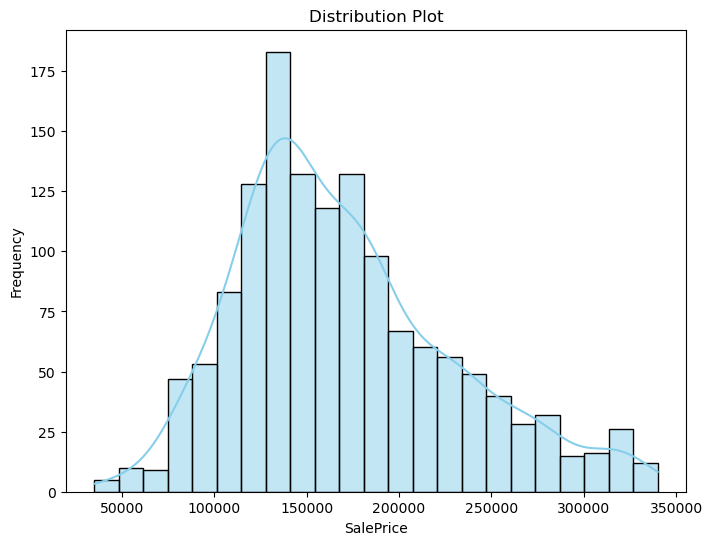

In [514]:
plt.figure(figsize=(8, 6))
sns.histplot(df_part1['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution Plot')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

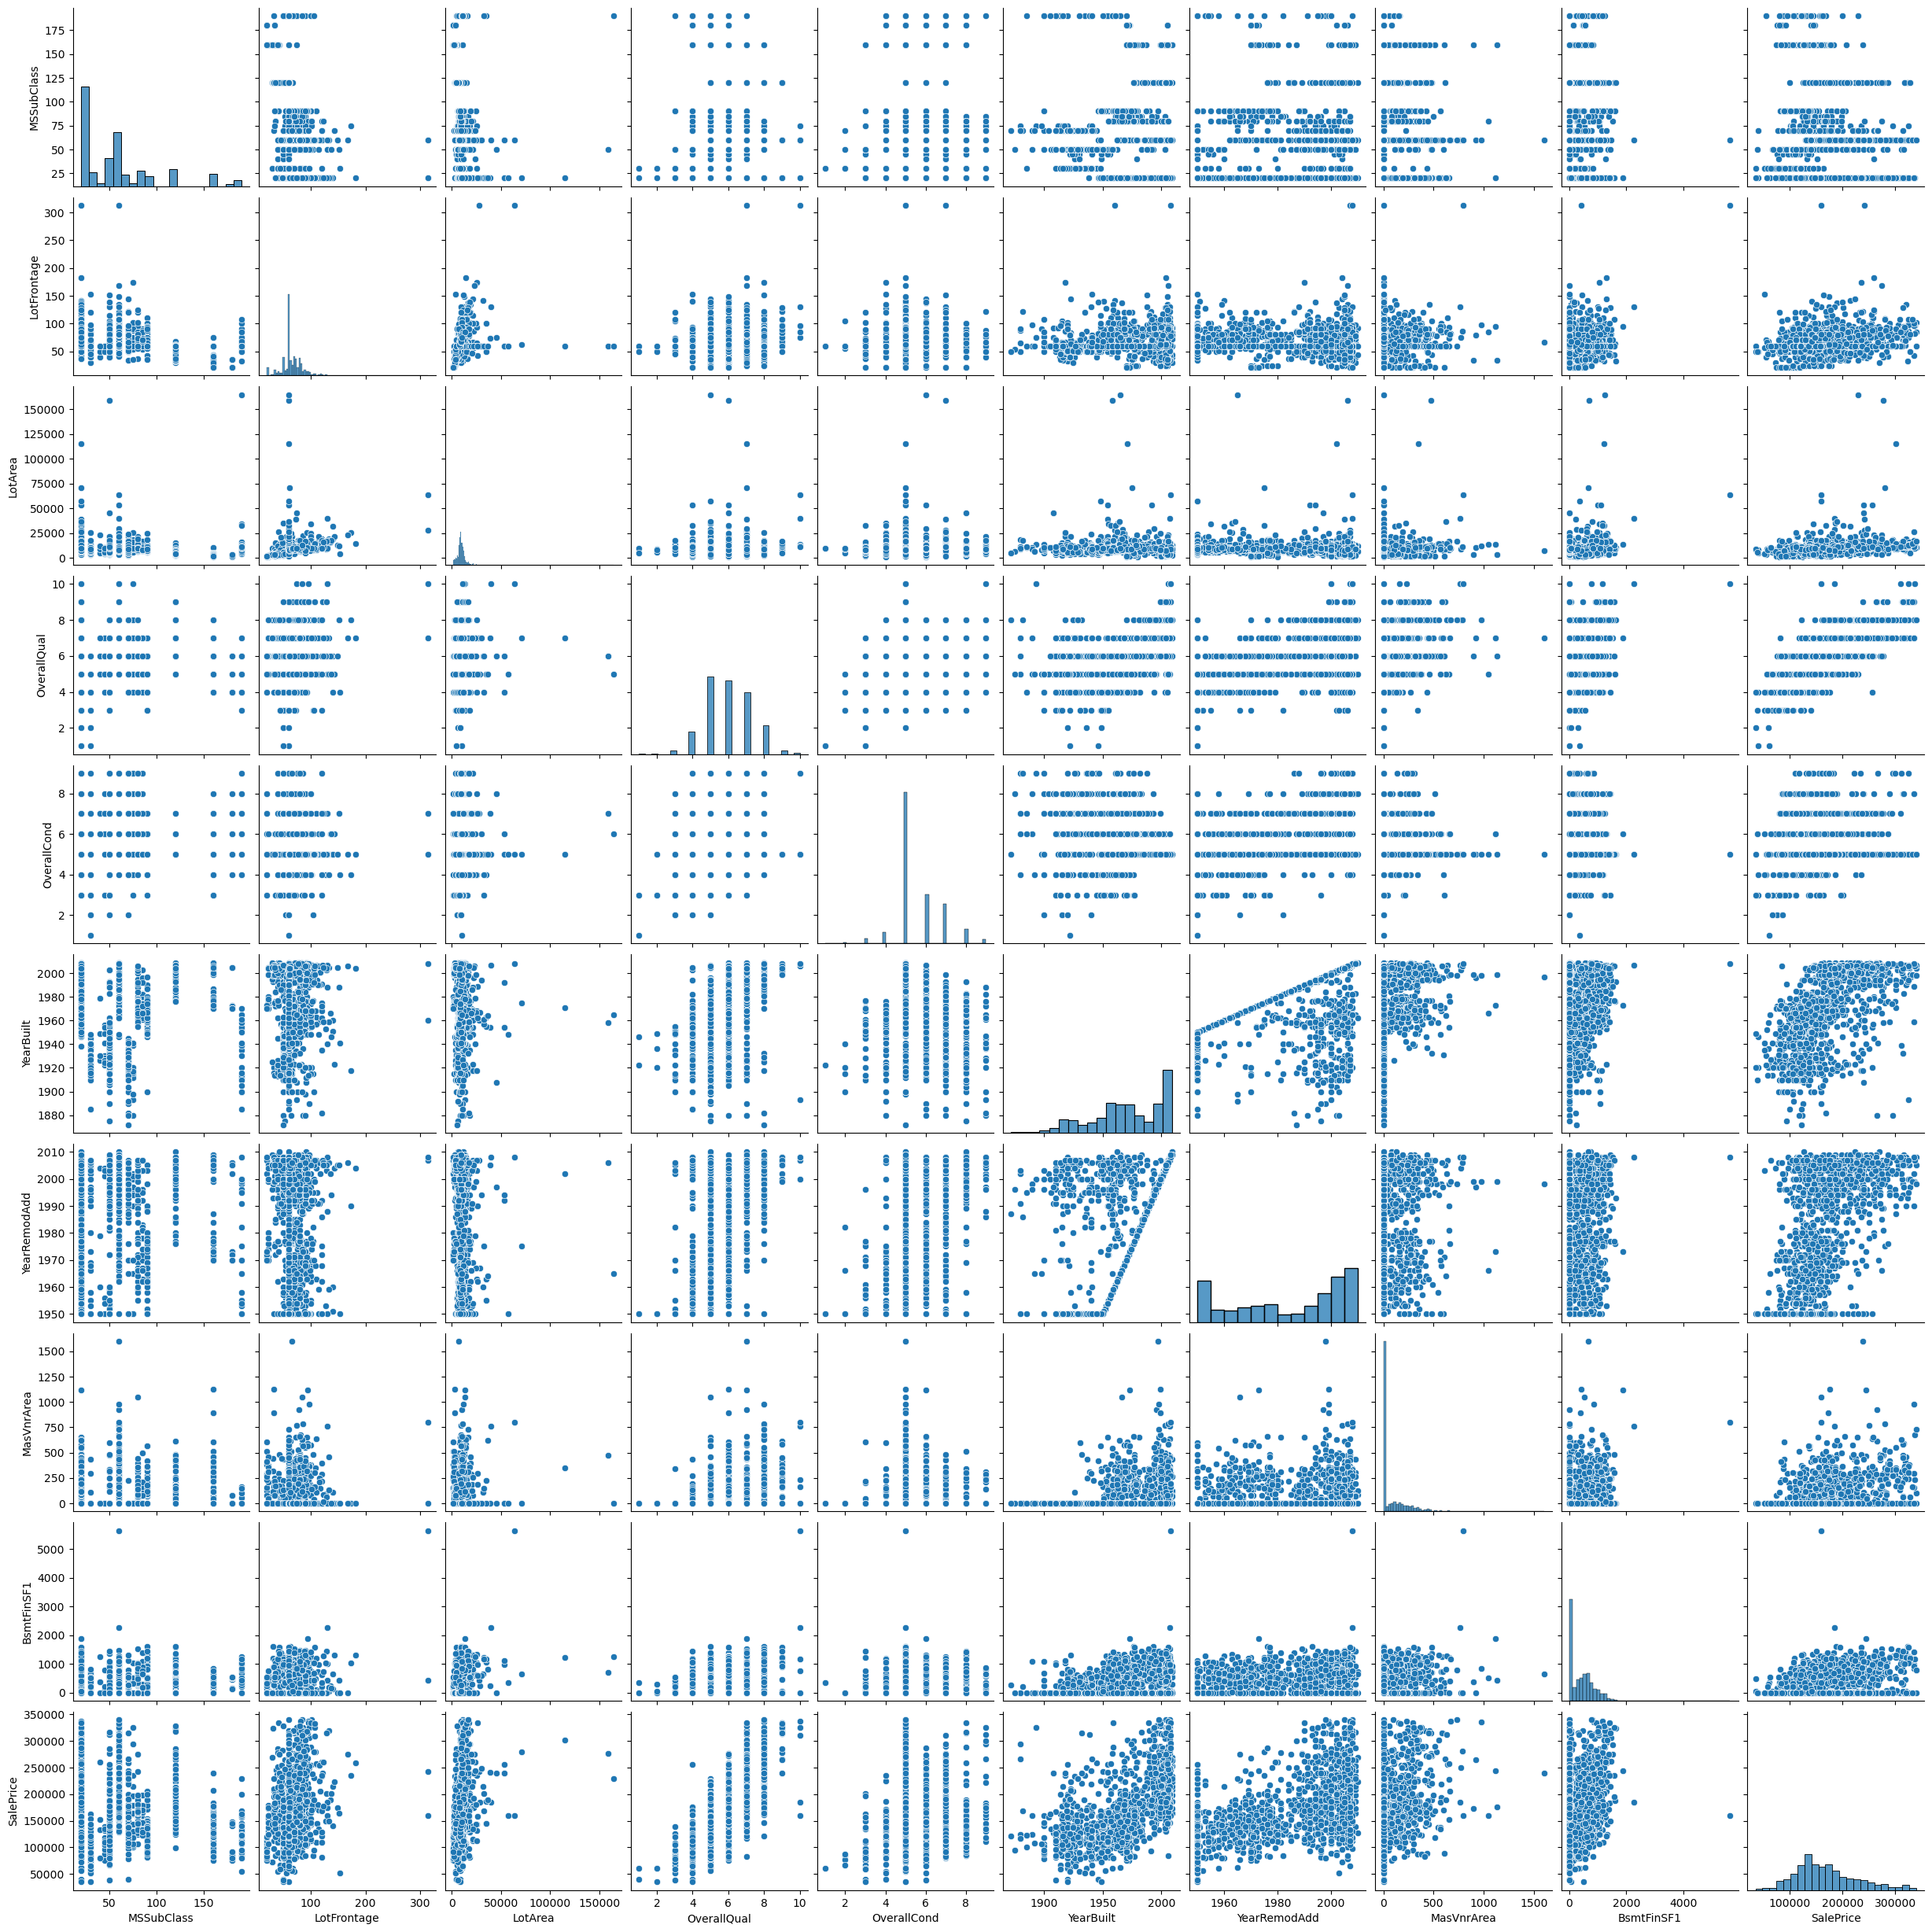

In [436]:
sns.pairplot(df_part1)
plt.show()

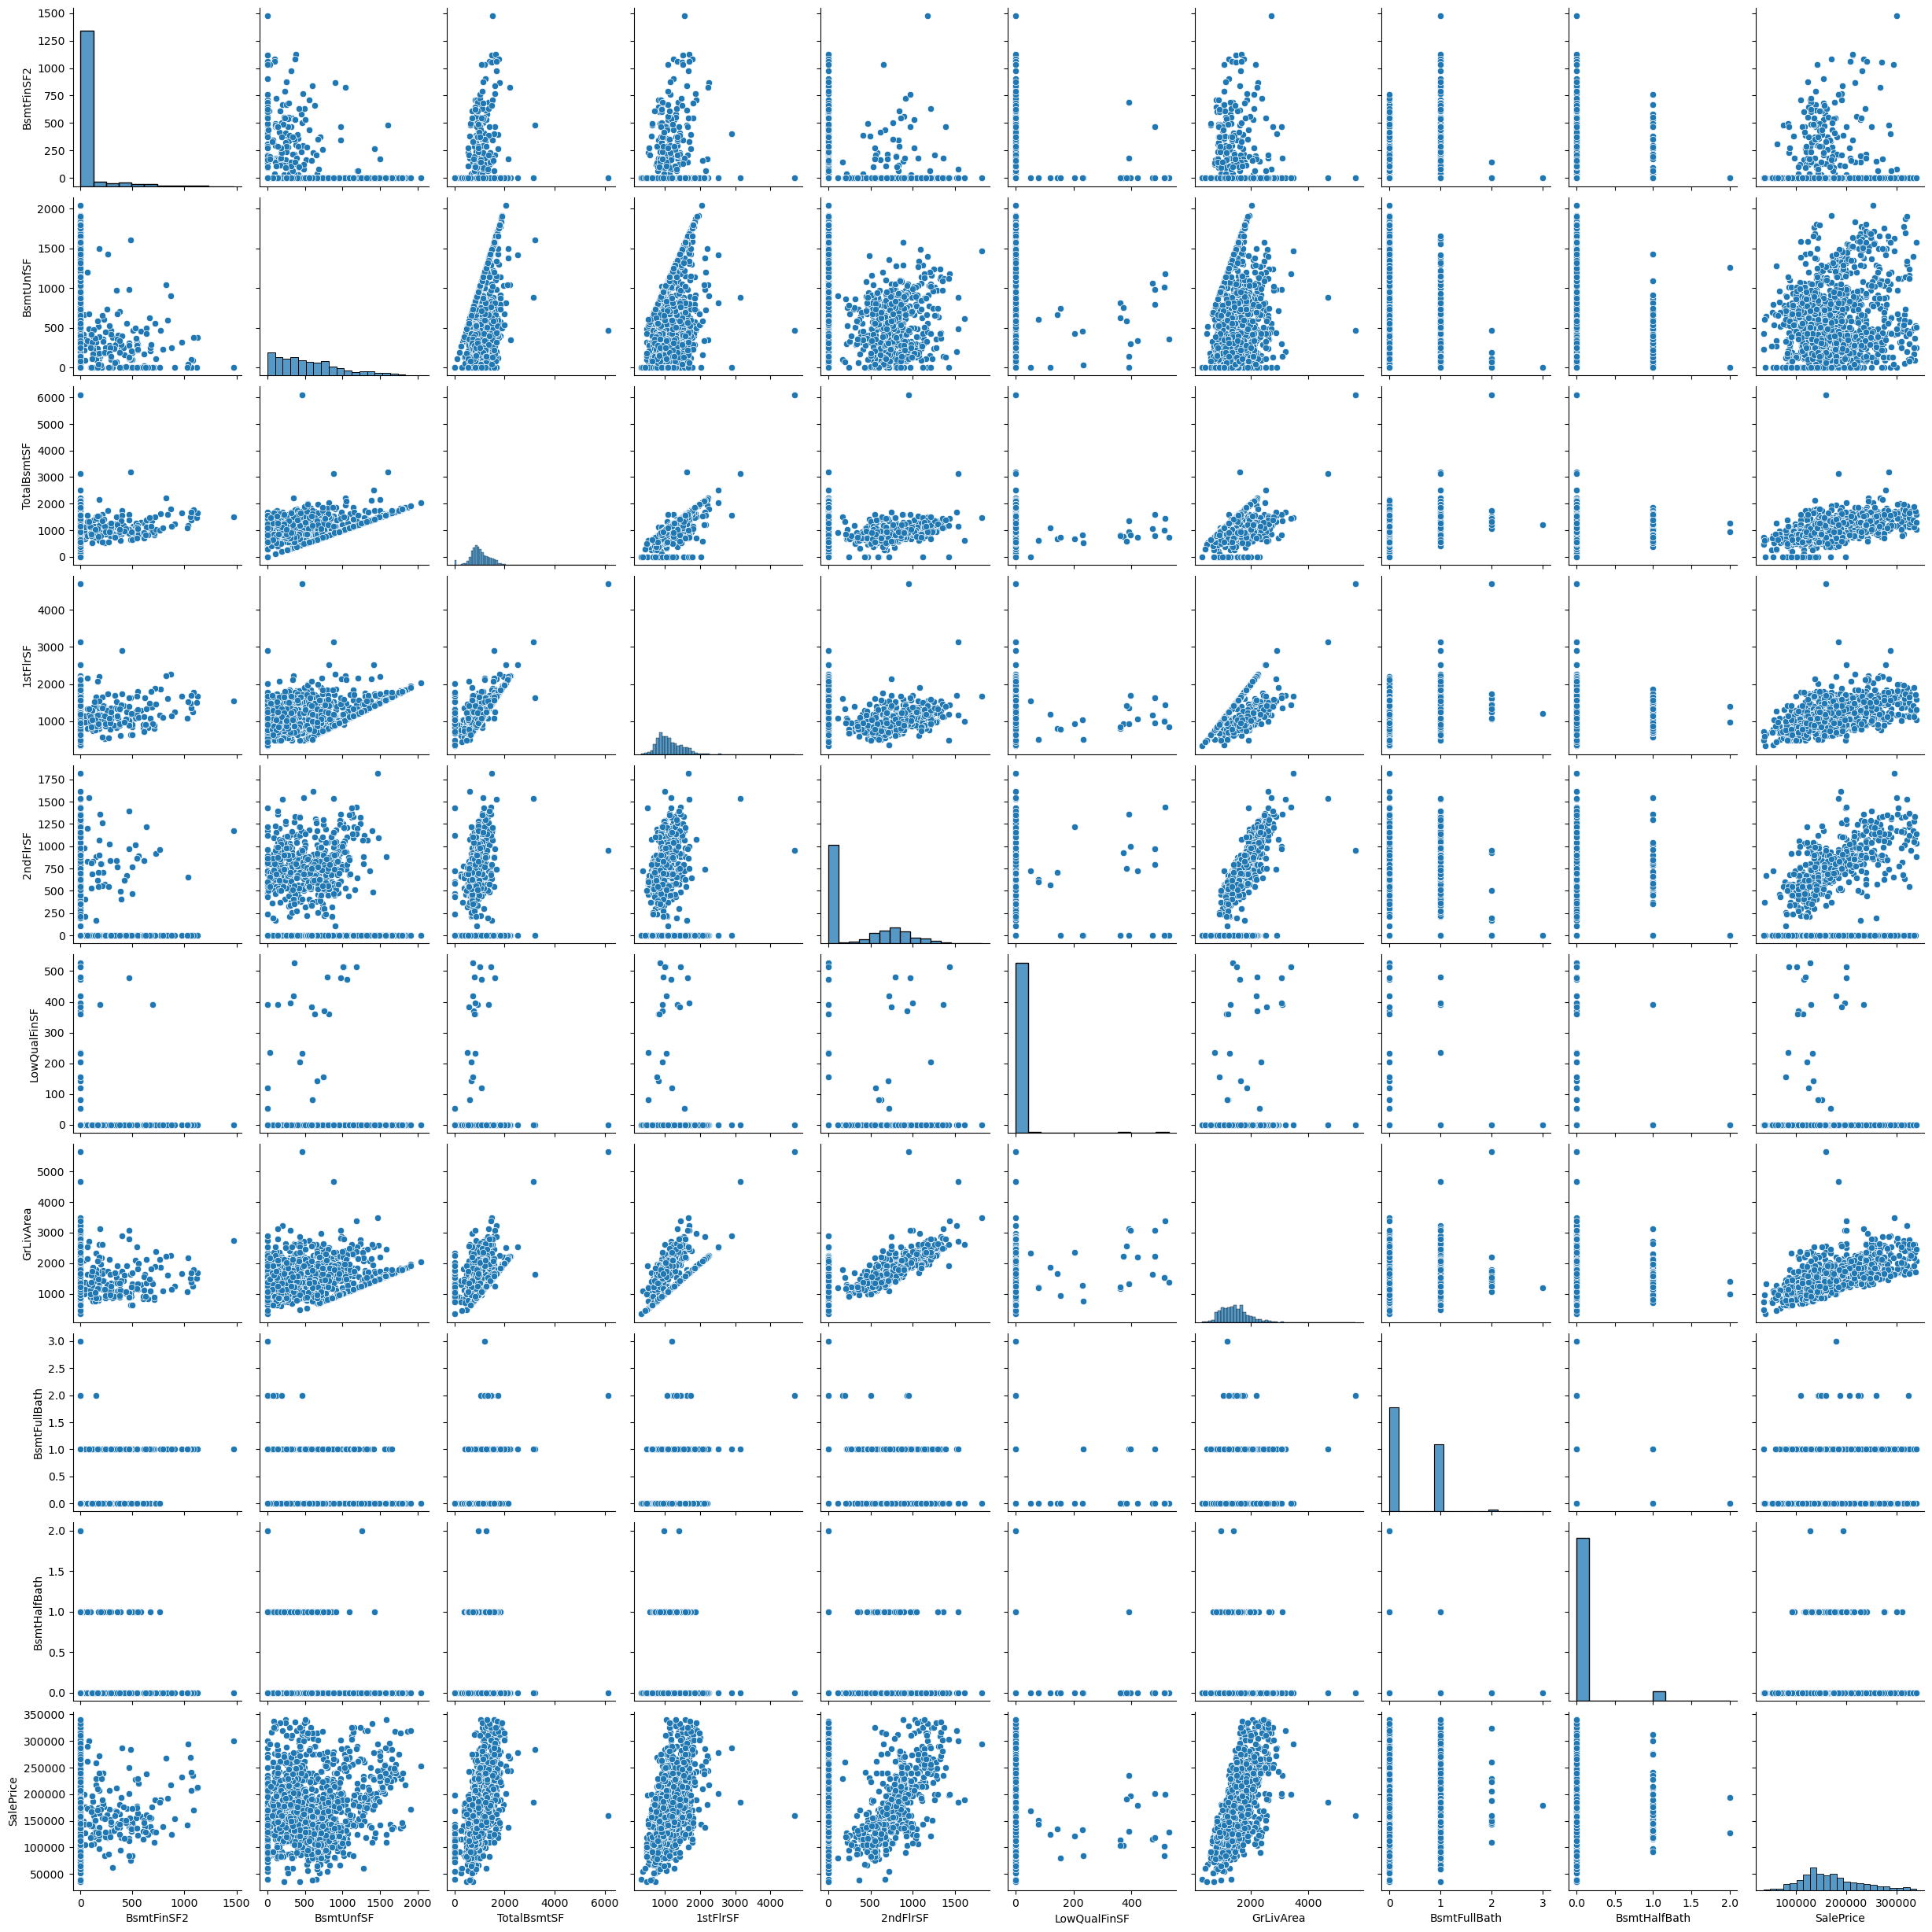

In [437]:
sns.pairplot(df_part2)
plt.show()

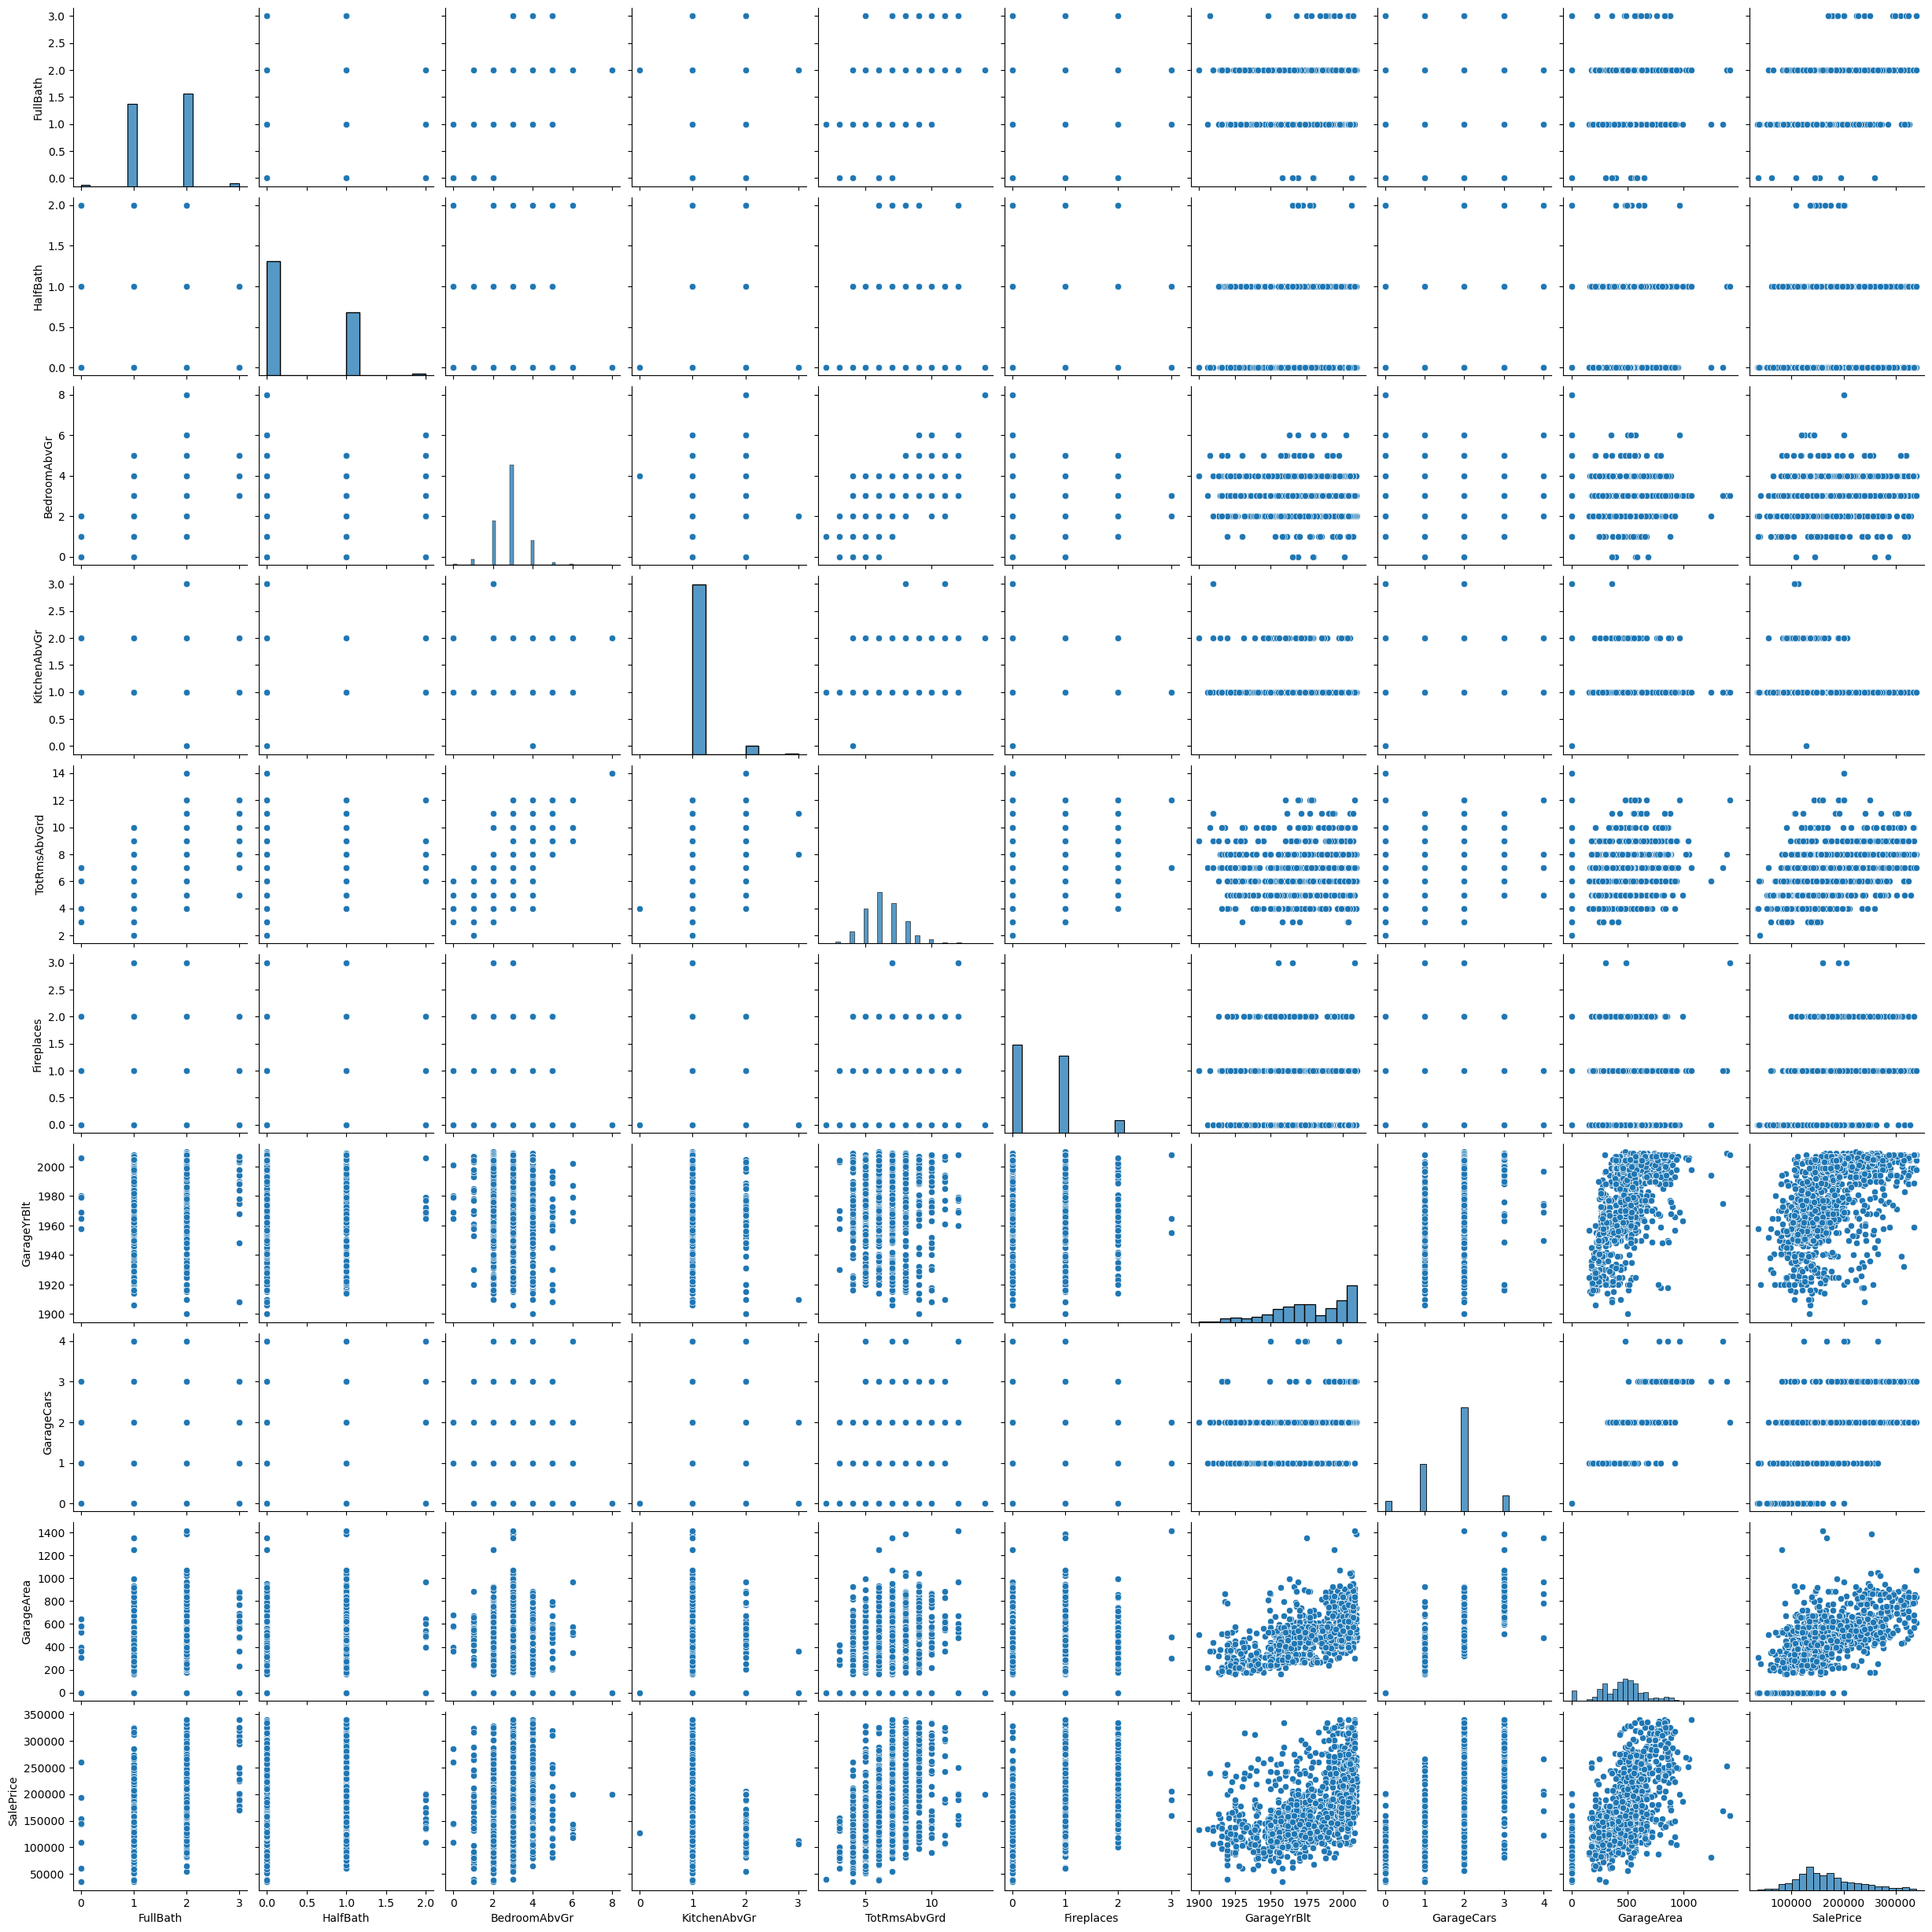

In [439]:
sns.pairplot(df_part3)
plt.show()

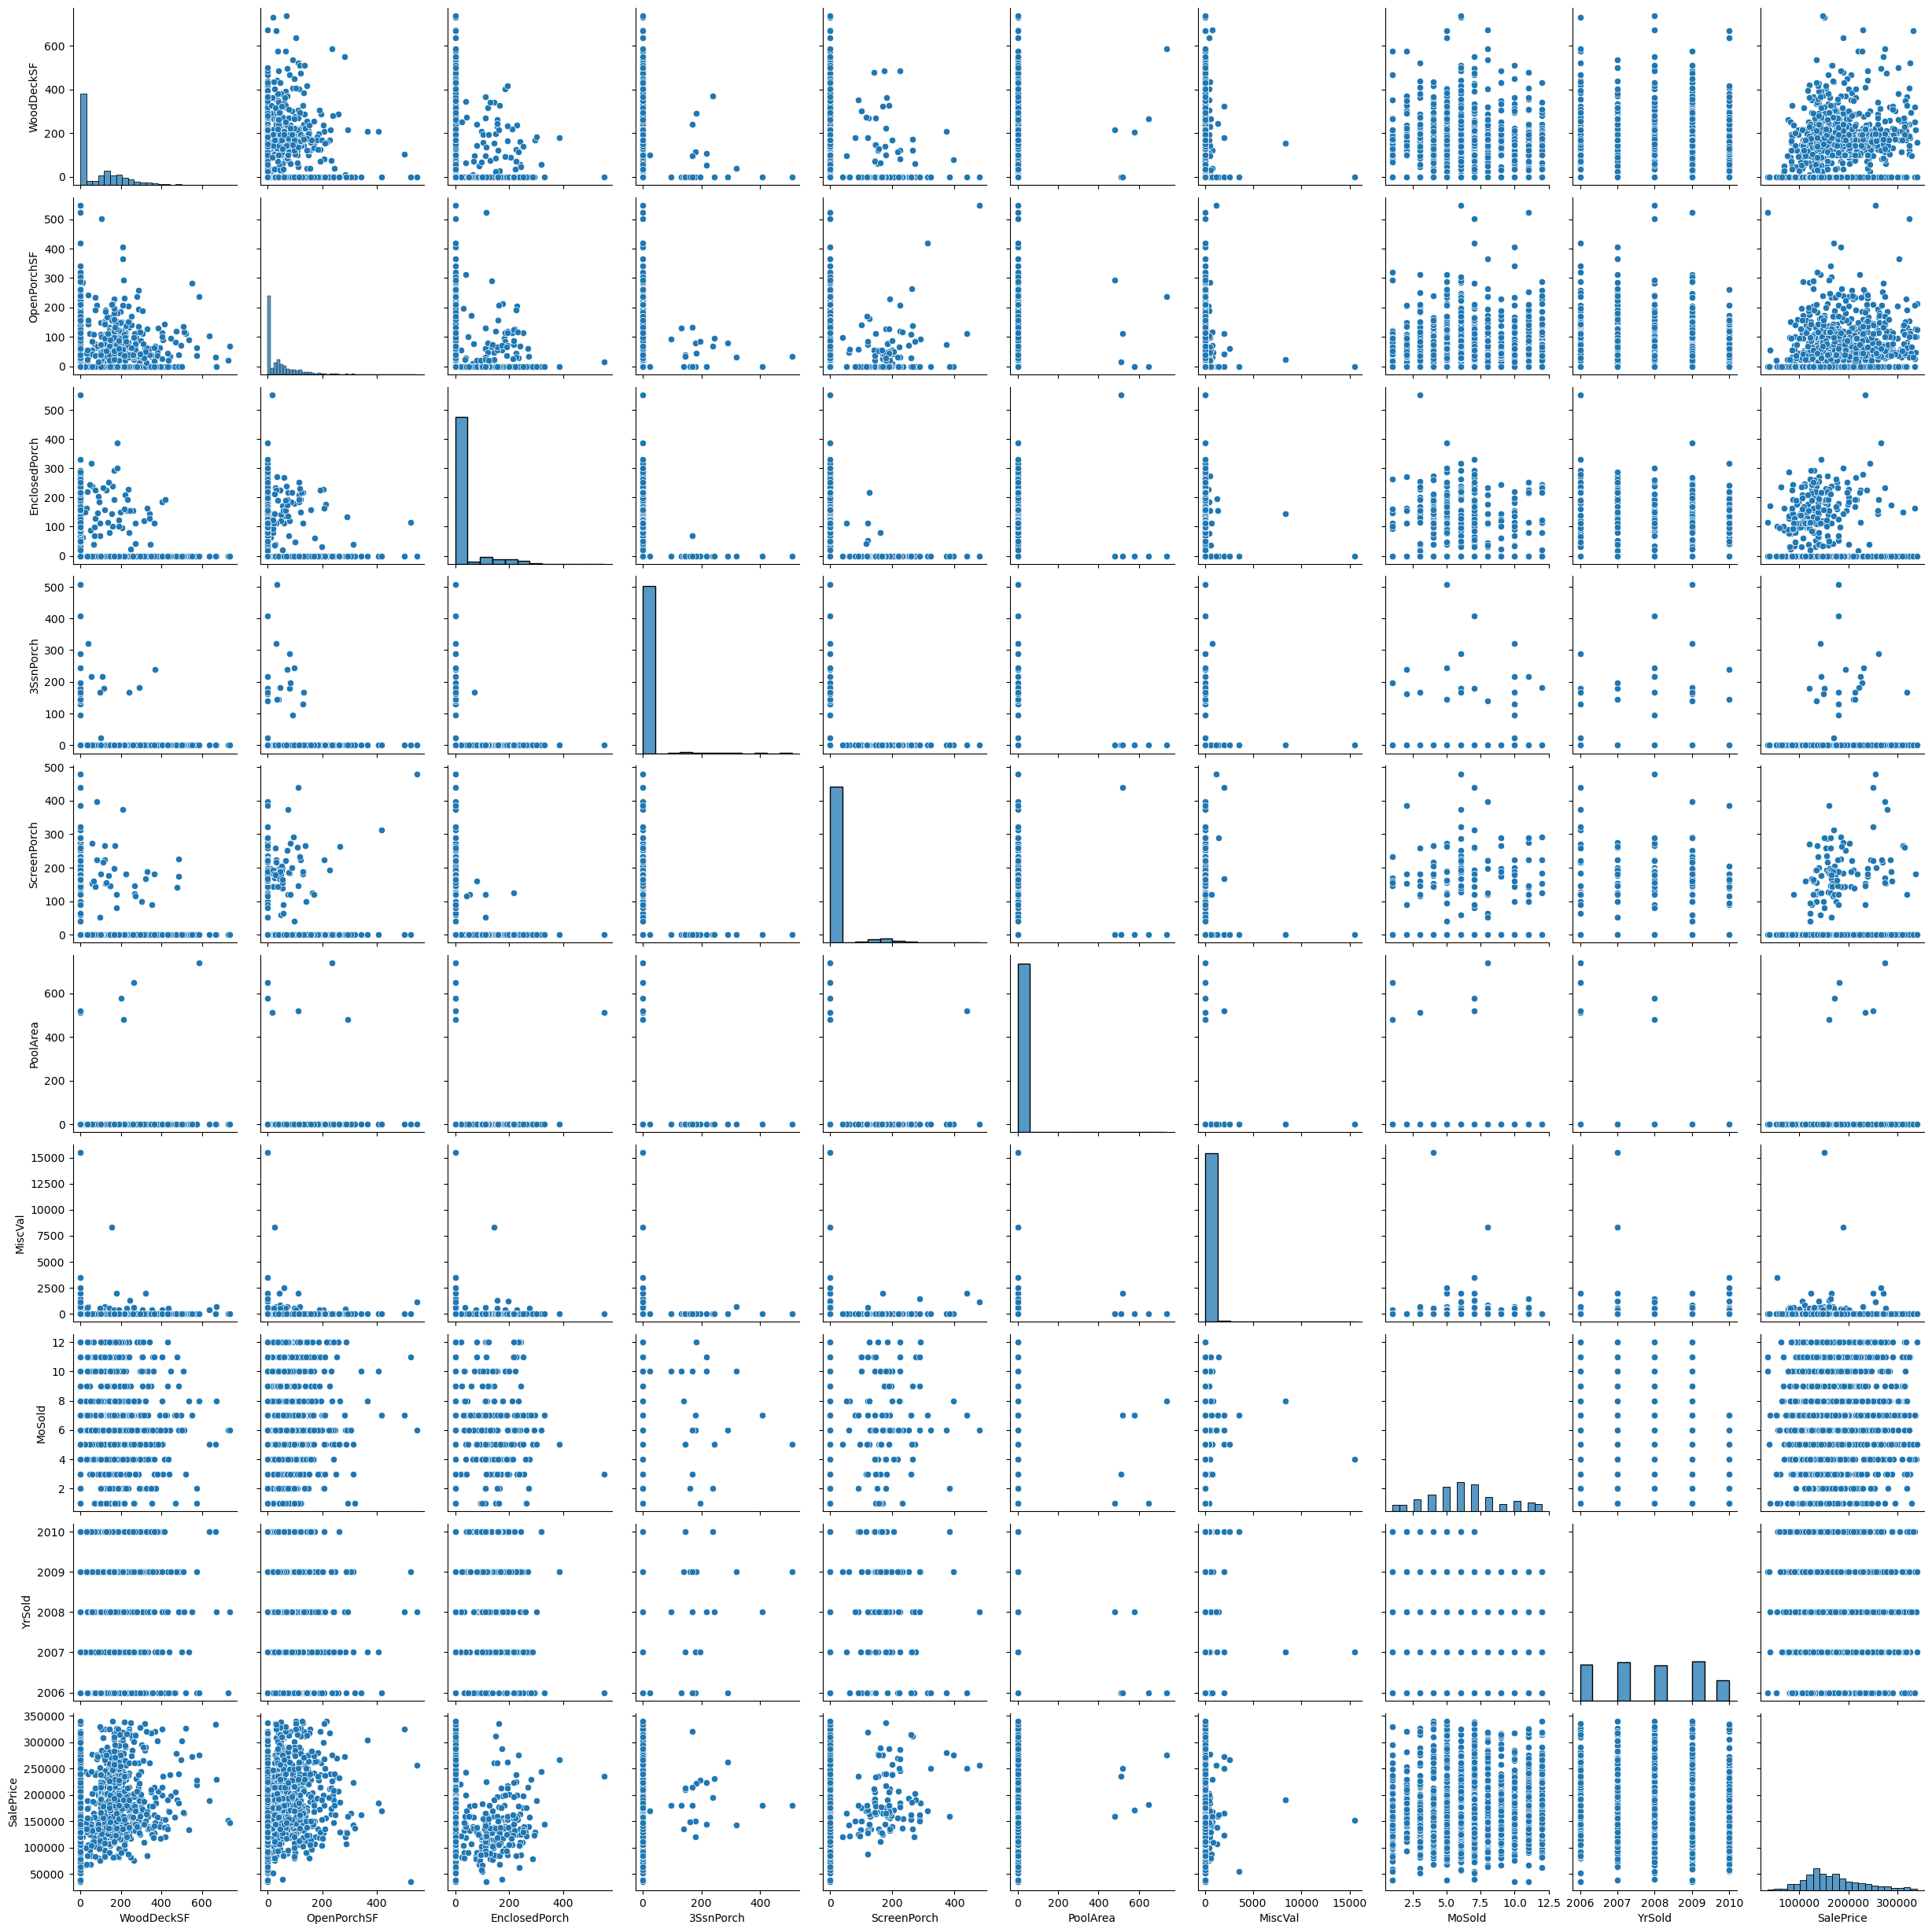

In [440]:
sns.pairplot(df_part4)
plt.show()

#### Observations
- observation#1

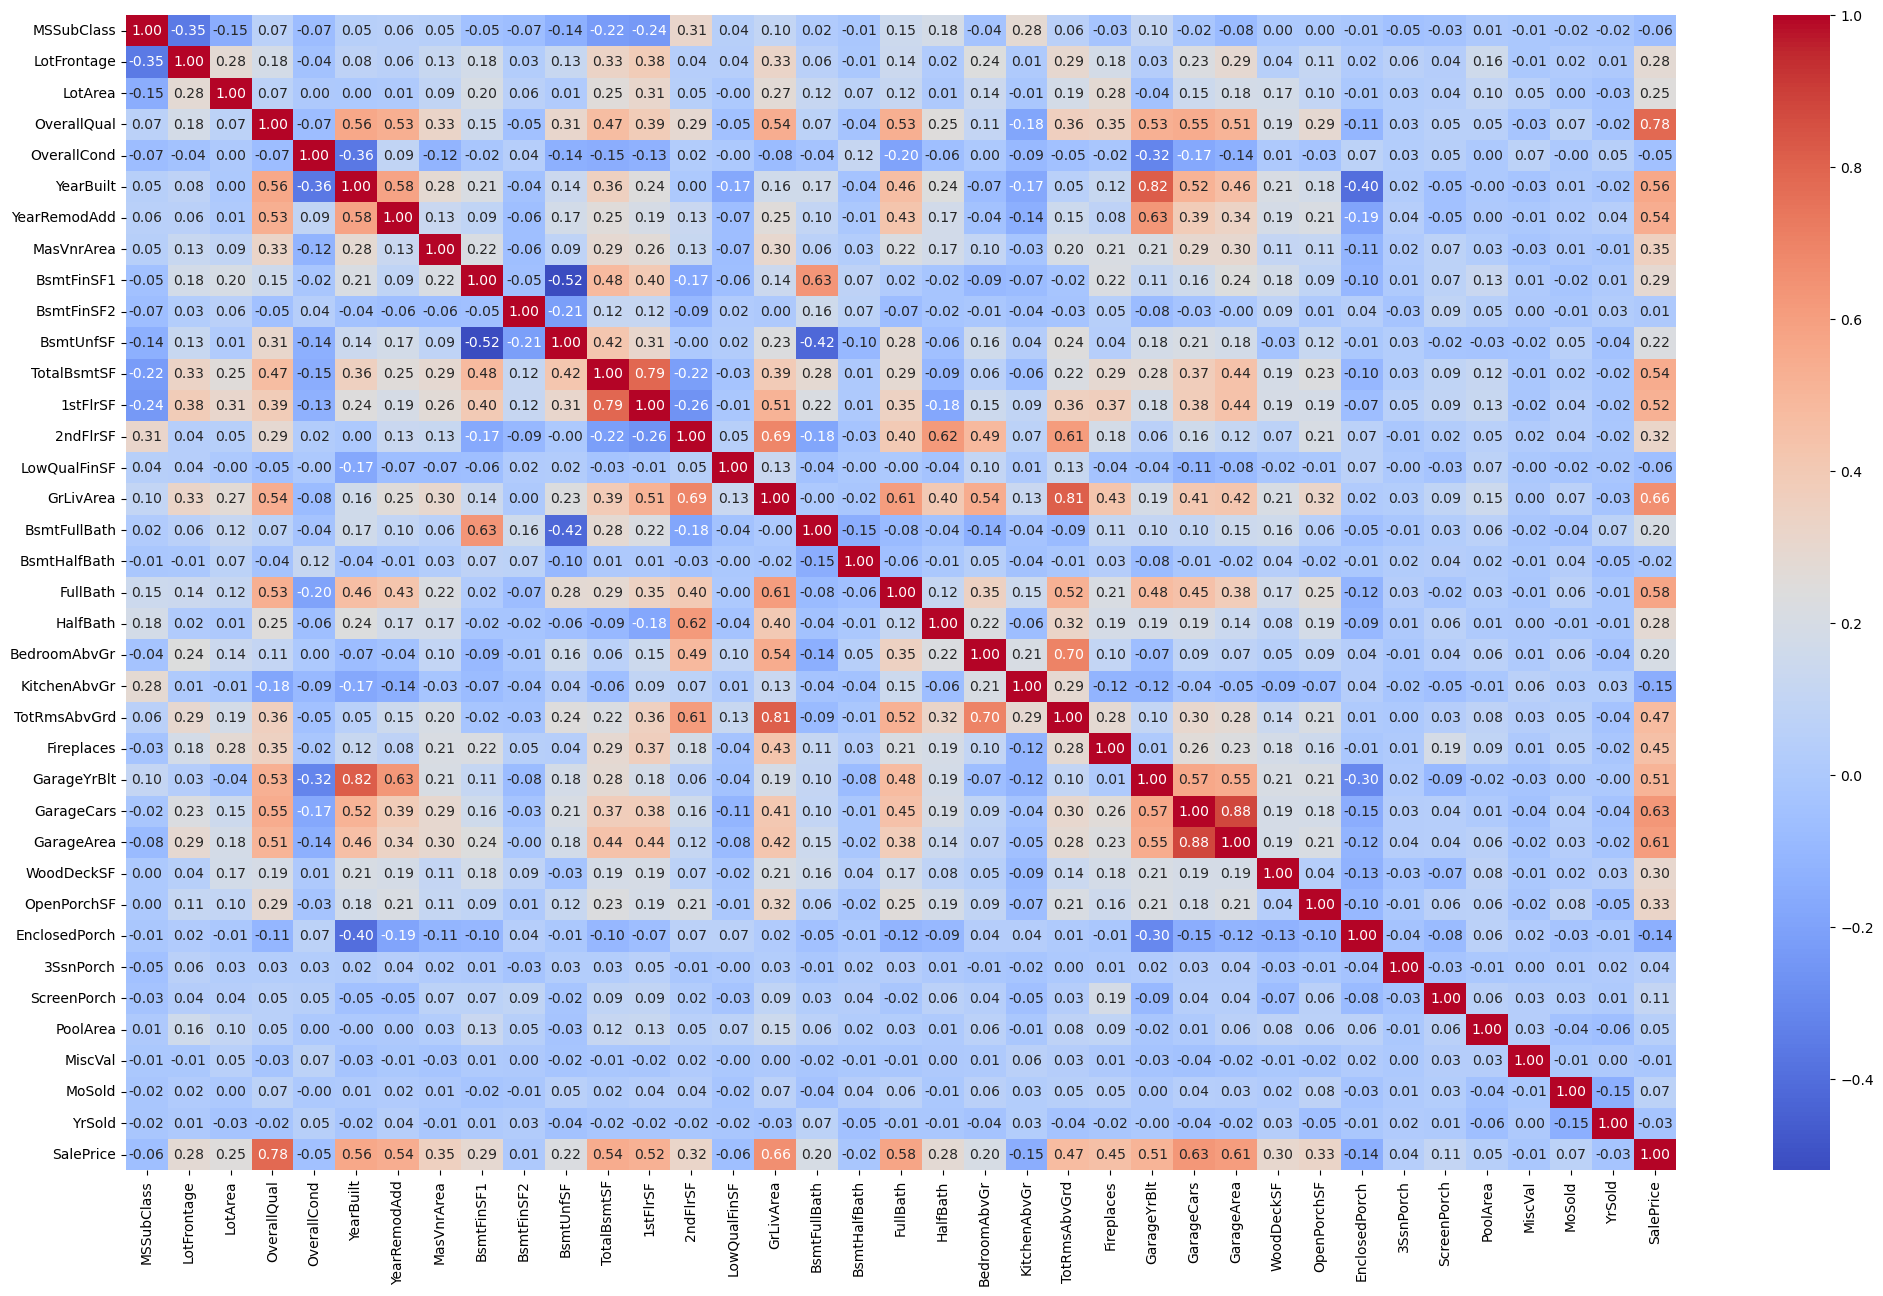

In [442]:
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

#### Observations
- observation #1

##### Visualising Categorical Variables

Let's use boxplot

In [515]:
category_columns = housingData_cleaned.select_dtypes(include='object')
print(len(category_columns.columns))

43


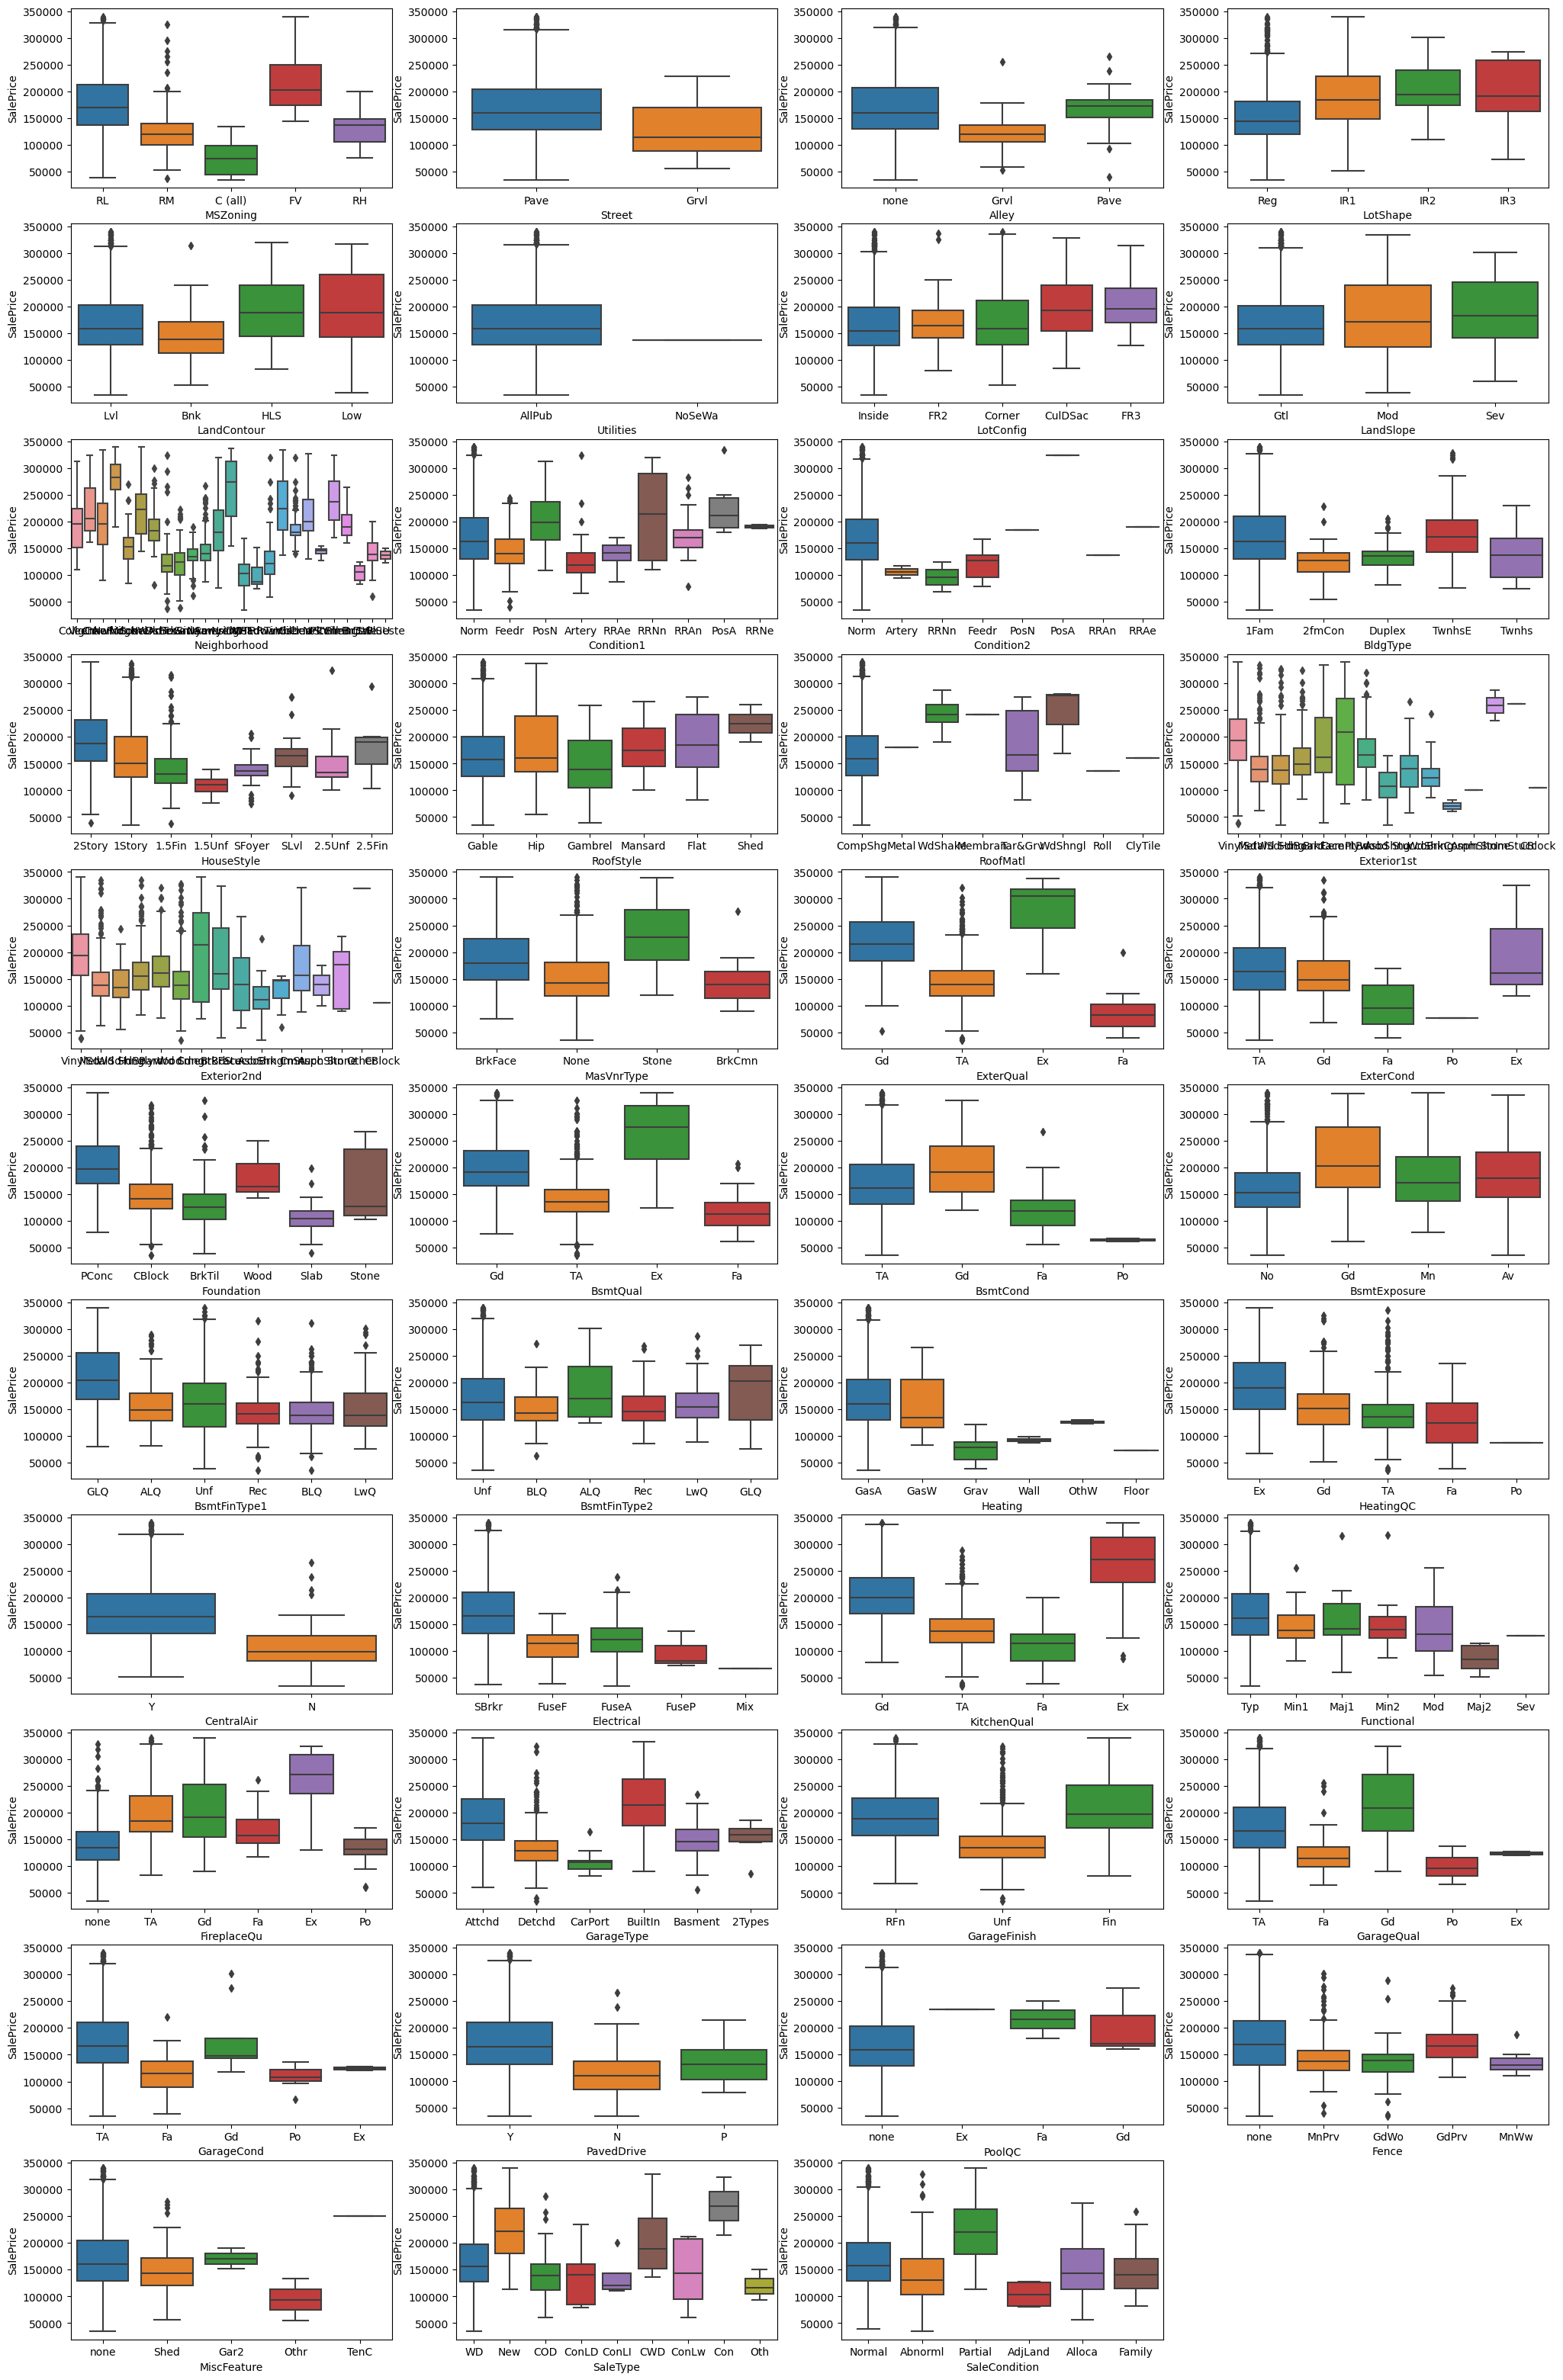

In [446]:
#cols=["season","yr","mnth","holiday","weekday","workingday",'weathersit']
plt.figure(figsize=(25, 80))
i=1
for col in category_columns:
    plt.subplot(22,4,i)
    i=i+1
    sns.boxplot(x=category_columns[col],y=housingData_cleaned['SalePrice'])
plt.show()

##### Observations
- 1) Observation #1

###### multivariate plot if any.

In [447]:
# plt.figure(figsize=(7, 4))
# sns.boxplot(x = 'workingday', y = 'cnt', hue = 'holiday', data = dailyBikeData)
# plt.show()

##### Observations

## Step 2: Data Preparation

### Dummy Variables

The categorical variables 'mnth', 'weekday', 'weathersit' and 'season' have more than 2 categorical levels which need to be converted to numeric for purpose of modelling. We will do this by generating `dummy variables`. Also other categorical variables having 2 categorical levels will be converted to binary numeric values.

In [516]:
for column in category_columns:
    print(housingData[column].describe())

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
count     1460
unique       3
top       none
freq      1369
Name: Alley, dtype: object
count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object
count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object
count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object
count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object
count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object
count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object
count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object
count     1460
unique       8
top       Norm
freq      1445
Name: Conditi

In [526]:
category_columns_list = category_columns.columns.tolist()
print(category_columns_list)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [518]:
for column in ['Street','Utilities','CentralAir']:
    print(category_columns[column].value_counts())

Street
Pave    1393
Grvl       6
Name: count, dtype: int64
Utilities
AllPub    1398
NoSeWa       1
Name: count, dtype: int64
CentralAir
Y    1304
N      95
Name: count, dtype: int64


In [527]:
category_columns_more_states = category_columns_list
for column in ['Street','Utilities','CentralAir']:
    category_columns_more_states.remove(column)
category_columns_more_states

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [533]:
housingData_DV = housingData_cleaned.copy(deep=True)
housingData_DV.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  none      Reg   
1          20       RL         80.0     9600   Pave  none      Reg   
2          60       RL         68.0    11250   Pave  none      IR1   
3          70       RL         60.0     9550   Pave  none      IR1   
4          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0   none  none        none   
1         Lvl    AllPub       FR2  ...        0   none  none        none   
2         Lvl    AllPub    Inside  ...        0   none  none        none   
3         Lvl    AllPub    Corner  ...        0   none  none        none   
4         Lvl    AllPub       FR2  ...        0   none  none        none   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [534]:
replace_values = {'Grvl':0,'Pave':1}
housingData_DV['Street'] = housingData_DV['Street'].map(replace_values)

In [535]:
replace_values = {'NoSeWa':0,'AllPub':1}
housingData_DV['Utilities'] = housingData_DV['Utilities'].map(replace_values)

In [536]:
replace_values = {'N':0,'Y':1}
housingData_DV['CentralAir'] = housingData_DV['CentralAir'].map(replace_values)

In [537]:
housingData_DV[['Street','Utilities','CentralAir']]

Street  Utilities  CentralAir
0          1          1           1
1          1          1           1
2          1          1           1
3          1          1           1
4          1          1           1
...      ...        ...         ...
1455       1          1           1
1456       1          1           1
1457       1          1           1
1458       1          1           1
1459       1          1           1

[1399 rows x 3 columns]

In [541]:
housingData_DV.shape

(1399, 80)

In [542]:
for column in category_columns_more_states:
    # Let's drop the first column from status df using 'drop_first = True'
    status = pd.get_dummies(housingData_DV[column], drop_first = True, dtype=int)

    # Drop 'season' as we have created the dummies for it
    housingData_DV.drop([column], axis = 1, inplace = True)

    # Add the results to the original housing dataframe
    housingData_DV = pd.concat([housingData_DV, status], axis = 1)

In [545]:
housingData_DV.shape

(1399, 251)

In [544]:
housingData_DV.head()

MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallQual  \
0          60         65.0     8450       1          1            7   
1          20         80.0     9600       1          1            6   
2          60         68.0    11250       1          1            7   
3          70         60.0     9550       1          1            7   
4          60         84.0    14260       1          1            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  ConLI  ConLw  New  \
0            5       2003          2003       196.0  ...      0      0    0   
1            8       1976          1976         0.0  ...      0      0    0   
2            5       2001          2002       162.0  ...      0      0    0   
3            5       1915          1970         0.0  ...      0      0    0   
4            5       2000          2000       350.0  ...      0      0    0   

   Oth  WD  AdjLand  Alloca  Family  Normal  Partial  
0    0   1        0       0       0       1        0  
1    0   1        0       0       0       1        0  
2    0   1        0       0       0       1        0  
3    0   1        0       0       0       0        0  
4    0   1        0       0       0       1        0  

[5 rows x 251 columns]

In [546]:
housingData_DV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1459
Columns: 251 entries, MSSubClass to Partial
dtypes: float64(3), int64(248)
memory usage: 2.7 MB


## Splitting the Data into Training and Testing Sets

In [547]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(housingData_DV, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features 

We will use MinMax scaling.

In [548]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1335]:
# Applying scaler() to all the columns except 'dummy' variables
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  spring  summer  winter  Aug  Dec  Feb  Jan  July  Jun  Mar  \
653  0.864243       0       0       1    0    0    0    0     0    0    0   
576  0.827658       0       0       0    0    0    0    0     1    0    0   
426  0.465255       1       0       0    0    0    0    0     0    0    1   
728  0.204096       1       0       0    0    1    0    0     0    0    0   
482  0.482973       0       1       0    0    0    0    0     0    0    0   

     May  Nov  Oct  Sep  Mon  Sat  Sun  Thurs  Tues  Wed  Light Rain  Mist  
653    0    0    1    0    0    0    0      1     0    0           0     0  
576    0    0    0    0    0    0    0      1     0    0           0     0  
426    0    0    0    0    1    0    0      0     0    0           0     1  
728    0    0    0    0    0    0    0      0     1    0           0     0  
482    0    0    0    0    1    0    0      0     0    0           0     1

### Dividing into X and Y sets for the model building

In [1336]:
# seperating target variable 'cnt' that is y variable
y_train = df_train.pop('cnt')
X_train = df_train

In [1337]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues',
       'Wed', 'Light Rain', 'Mist'],
      dtype='object')

## Step 3: Building and Training model

We will be using the **SciKit Learn** and RFE.

#### RFE
Recursive feature elimination

In [1338]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1339]:
# Fitting the model with training data
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 20
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1340]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 14),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 12),
 ('Sun', False, 10),
 ('Thurs', False, 9),
 ('Tues', True, 1),
 ('Wed', False, 8),
 ('Light Rain', True, 1),
 ('Mist', True, 1)]

In [1341]:
# gettting only the rfe selected columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'July', 'Sep', 'Mon', 'Tues', 'Light Rain', 'Mist'],
      dtype='object')

In [1342]:
#looking at the rejected columns
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sat', 'Sun', 'Thurs', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [1343]:
import statsmodels.api as sm 

In [1344]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.13e-191
Time:                        23:35:54   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.0

`holiday` is insignificant with 0.373 p-value, will drop.

In [1345]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [1234]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'July', 'Sep', 'Mon', 'Tues', 'Light Rain', 'Mist'],
      dtype='object')

Rebuilding the model without `holiday`

In [1346]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [1347]:
lm2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1348]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.13e-191
Time:                        23:36:05   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.042      4.276      0.0

#### Calculating VIF

In [1349]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'July', 'Sep', 'Mon', 'Tues', 'Light Rain', 'Mist'],
      dtype='object')

In [1350]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [1351]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3          hum  32.14
2         temp  18.98
1   workingday  18.41
10         Mon   4.91
4    windspeed   4.90
5       spring   4.80
11        Tues   4.76
7       winter   3.71
6       summer   3.03
13        Mist   2.31
0           yr   2.09
8         July   1.60
9          Sep   1.38
12  Light Rain   1.25

`hum` has high VIF will drop

In [1352]:
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [1353]:
X_train_new.columns 

Index(['yr', 'workingday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'July', 'Sep', 'Mon', 'Tues', 'Light Rain', 'Mist'],
      dtype='object')

Rebuilding the model without `hum`

In [1354]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [1355]:
X_train_lm.columns 

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'July', 'Sep', 'Mon', 'Tues', 'Light Rain', 'Mist'],
      dtype='object')

In [1356]:
lm3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1357]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.73e-189
Time:                        23:36:27   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.038      2.618      0.0

#### Calculating VIF

In [1184]:
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'July', 'Sep', 'Mon', 'Tues', 'Light Rain', 'Mist'],
      dtype='object')

In [1358]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1   workingday  16.19
2         temp  12.73
3    windspeed   4.75
9          Mon   4.45
10        Tues   4.21
4       spring   3.82
6       winter   2.80
5       summer   2.75
0           yr   2.07
7         July   1.60
12        Mist   1.58
8          Sep   1.35
11  Light Rain   1.09

`workingday` has high VIF will drop

In [1359]:
X_train_new = X_train_new.drop(['workingday'], axis = 1)

In [1361]:
X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'July', 'Sep',
       'Mon', 'Tues', 'Light Rain', 'Mist'],
      dtype='object')

Rebuilding the model without `workingday`

In [1362]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [1249]:
X_train_lm.columns 

Index(['const', 'yr', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'July', 'Sep', 'Mon', 'Tues', 'Light Rain', 'Mist'],
      dtype='object')

In [1363]:
lm4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1364]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.01e-186
Time:                        23:36:45   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2005      0.030      6.771      0.0

`Mon` is insignificant with 0.171 p-value, will drop.

In [1365]:
X_train_new = X_train_new.drop(["Mon"], axis = 1)

In [1193]:
X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'July', 'Sep',
       'Tues', 'Light Rain', 'Mist'],
      dtype='object')

Rebuilding the model without `Mon`

In [1366]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [1367]:
lm5 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1368]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.65e-187
Time:                        23:36:54   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2036      0.030      6.889      0.0

cnt = 0.2036 + (0.2338 × yr) + (0.4923 × temp) + (-0.1498 × windspeed) + (-0.0680 × spring) + (0.0467 × summer) + (0.0831 × winter) + (-0.0486 × July)+ (0.0721 × sep) + (-0.0456 × Tues) + (-0.2856 × Light Rain) + (-0.0816 × Mist)

#### Calculating VIF

In [1256]:
X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'July', 'Sep',
       'Tues', 'Light Rain', 'Mist'],
      dtype='object')

In [1369]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1         temp  5.13
2    windspeed  4.60
4       summer  2.22
3       spring  2.09
0           yr  2.07
5       winter  1.80
6         July  1.59
10        Mist  1.55
7          Sep  1.33
8         Tues  1.17
9   Light Rain  1.08

#### `temp` has VIF near 5 and since we have seen `temp` having high correlation to `cnt` in EDA we will not drop and consider lm5 our final model.

#### After 5 iterations lm5 could be our final model as R-squared, Adj. R-sqaured, p-values and VIF look good.

## Step  3: Residual Analysis

Check if the error terms of train data are normally distributed as per assumption of linear regression. Let us plot the histogram of the error terms and see what it looks like.

In [1371]:
#predicting using final model lm7 
y_train_pred = lm5.predict(X_train_lm)

In [1372]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

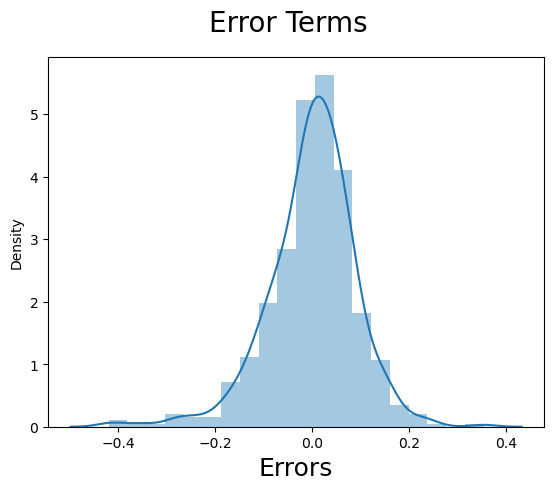

In [1373]:
# Plot the histogram of the error terms
fig = plt.figure()
res = y_train - y_train_pred
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### The error terms are normally distributed with mean 0.

## Step 4: Prediction and evaluation of models


#### Applying the scaling on the test sets

In [1374]:
#num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
#scaling test data
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1375]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.459904    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt      spring      summer      winter         Aug  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.313350    0.520592    0.255708    0.264840    0.232877    0.059361   
std      0.159947    0.218435    0.437258    0.442259    0.423633    0.236840   
min     -0.042808    0.048205    0.000000    0.000000    0.000000    0.000000   
25%      0.198517    0.377531    0.000000    0.000000    0.000000    0.000000   
50%      0.299459    0.524275    0.000000    0.000000    0.000000    0.000000   
75%      0.403048    0.672745    1.000000    1.000000    0.000000    0.000000   
max      0.807474    0.963300    1.000000    1.000000    1.000000    1.000000   

              Dec         Feb         Jan        July         Jun         Mar  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.086758    0.100457    0.077626    0.105023    0.095890    0.054795   
std      0.282125    0.301297    0.268194    0.307285    0.295115    0.228100   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              May         Nov         Oct         Sep         Mon         Sat  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.086758    0.073059    0.082192    0.086758    0.118721    0.164384   
std      0.282125    0.260830    0.275286    0.282125    0.324202    0.371472   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Sun       Thurs        Tues         Wed  Light Rain        Mist  
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000  
mean     0.178082    0.164384    0.146119    0.127854    0.027397    0.319635  
std      0.383458    0.371472    0.354034    0.334692    0.163612    0.467403  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

#### Dividing into X_test and y_test

In [1376]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1377]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1378]:
# Making predictions
y_pred = lm5.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

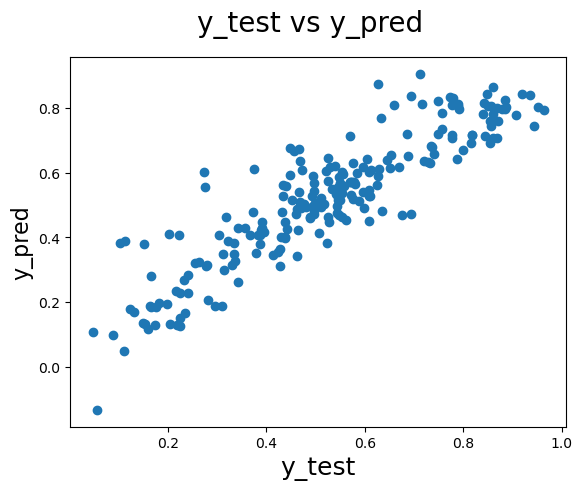

In [1379]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [1380]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8360233701515918

In [1381]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.805407680173852

#### With the r2_score of 0.81 on test data we are confident that the model fit isn't by chance, and has decent predictive power.

The equation of our best fitted line is:

cnt = 0.2036 + (0.2338 × yr) + (0.4923 × temp) + (-0.1498 × windspeed) + (-0.0680 × spring) + (0.0467 × summer) + (0.0831 × winter) + (-0.0486 × July)+ (0.0721 × sep) + (-0.0456 × Tues) + (-0.2856 × Light Rain) + (-0.0816 × Mist)

The above equation tells which features which variables are significant in predicting the demand for shared bikesa and how well those variables describe the bike demands.

Based on the final model the top 3 features which most contribute in predicting the demand are;

- ‘temp’ (Temperature)  which has positive correlation with demand for bikes.
- ‘Light Rain’  (Light rain/snow weather) which has negative correlation with demand for bikes. 
- ‘yr’ (Year) which has positive correlation with demand for bikes.